In [14]:
import numpy as np
import pandas as pd
import os
import json
import pickle

In [15]:
with open('lang_dict_4_gram.json', 'r') as f:
    lang_dict_n_gram = pickle.load(f)

In [16]:
print(len(lang_dict_n_gram['en'].keys()))
print(lang_dict_n_gram['en']['the'])

8192
5324


In [17]:
test_data, test_labels = [], []
with open("/workspace/lang-detect/europarl.test", "r") as f:
    for line in f:
        line = line.split()
        test_data.append(" ".join(line[1:]))
        test_labels.append(line[0])
print(test_data[0], test_labels[0])

('"\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 2020" \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82\xd0\xb0\xd1\x80\xd1\x82\xd0\xb8\xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe\xd0\xbd\xd0\xba\xd1\x83\xd1\x80\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0\xd1\x80\xd0\xb0\xd1\x82\xd0\xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0\xb7\xd1\x85\xd0\xbe\xd0\xb4 \xd1\x81 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb8\xd0\xb7\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f.', 'bg')


In [18]:
print(len(test_data))

21000


In [19]:
import utils

for i in range(len(test_data)):
    test_data[i] = utils.preprocess(test_data[i])

new_data = [0]*len(test_data)

for i in range(len(test_data)):
    new_data[i] = utils.create_n_gram(test_data[i], 4)

In [20]:
new_data[:2]

['\xd0\x95\xd0\xb2 \x95\xd0\xb2\xd1 \xd0\xb2\xd1\x80 \xb2\xd1\x80\xd0 \xd1\x80\xd0\xbe \x80\xd0\xbe\xd0 \xd0\xbe\xd0\xbf \xbe\xd0\xbf\xd0 \xd0\xbf\xd0\xb0 \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80 \x82\xd1\x80\xd1 \xd1\x80\xd1\x8f \x80\xd1\x8f\xd0 \xd1\x8f\xd0\xb1 \x8f\xd0\xb1\xd0 \xd0\xb1\xd0\xb2 \xb1\xd0\xb2\xd0 \xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82 \x81\xd1\x82\xd0 \xd1\x82\xd0\xb0 \x82\xd0\xb0\xd1 \xd0\xb0\xd1\x80 \xb0\xd1\x80\xd1 \xd1\x80\xd1\x82 \x80\xd1\x82\xd0 \xd1\x82\xd0\xb8 \x82\xd0\xb8\xd1 \xd0\xb8\xd1\x80 \xb8\xd1\x80\xd0 \xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe \xbd\xd0\xbe\xd0 \xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe \xba\xd0\xbe\xd0 \xd0\xbe\xd0\xbd \xbe\xd0\xbd\xd0 \xd0\xbd\xd0\xba \xbd\xd0\xba\xd1 \xd0\xba\xd1\x83 \xba\xd1\x83\xd1 \xd1\x83\xd1\x80 \x83\xd1\x80\xd0 \xd1\x80\xd0\xb5 \x80\xd0\xb5\xd0 \xd0\xb5\xd0\xbd \xb5\xd0\xbd\xd1 \xd0\xbd\xd1\x82 \xbd\xd1\x82\xd0 \xd1\x82\xd0\xb5 \x82\xd0\xb5\xd0 \xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0 \xbc\xd0\xb0\xd1 \xd0\xb0\xd1\x80 \xb0\xd1\x80

In [21]:
# Based on total occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += lang_dict_n_gram[key][token]
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [22]:
print(len(output_labels), len(test_labels))

(21000, 21000)


In [23]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 90.12380952380953)


In [24]:
# Based on 0-1 occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += 1
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [25]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 99.53333333333333)


#### **Wow!! Accuracy based on 0-1 occurence is 99.53% which is just perfect while if we include total frequency of each token, then the accuracy reduces to 90.12% which is not bad either.**

In [26]:
# Test few cases where this model didn't work
num_case = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        print(new_data[i])
        print("Actual Language {0} | Predicted Language {1}".format(test_labels[i], output_labels[i]))
        count = {}
        for key in lang_dict_n_gram.keys():
            count[key] = 0
        for token in new_data[i].split():
            for key in lang_dict_n_gram.keys():
                if token in lang_dict_n_gram[key]:
                    count[key] += 1
        print(count)
        print("--------------------------------")
        num_case += 1
        if num_case == 10:
            break

děk ěku �kuj kuji vám pane batt atte tten tene
Actual Language cs | Predicted Language en
{'pl': 2, 'el': 1, 'fr': 4, 'bg': 1, 'nl': 4, 'ro': 2, 'pt': 2, 'de': 4, 'sv': 4, 'da': 4, 'lv': 2, 'cs': 3, 'lt': 1, 'en': 5, 'sk': 1, 'sl': 1, 'it': 4, 'et': 4, 'hu': 5, 'fi': 5, 'es': 3}
--------------------------------
jmen meno enov nova oval vali se will illi llia liam meye eyer bern erna rnar nard star tari arie regi egin gina inal nald pike thom homa omas shaw jame ames mcle clei leis eish arch rchi chib hiba ibal bald barr arro rrow rowm owma wman a albe lber bert robe ober bert erts a vši šic �ich ichn chni budo udou v sobo obot botu vyzn yzna znam name amen men� ená nán áni
Actual Language cs | Predicted Language sk
{'pl': 28, 'el': 10, 'fr': 28, 'bg': 8, 'nl': 30, 'ro': 25, 'pt': 30, 'de': 34, 'sv': 29, 'da': 25, 'lv': 23, 'cs': 39, 'lt': 35, 'en': 33, 'sk': 40, 'sl': 29, 'it': 28, 'et': 30, 'hu': 26, 'fi': 27, 'es': 29}
--------------------------------
napr apro pros rost osto souh ou

#### **If we actually notice the difference between actual language and predicted language, we see very less difference in terms of occurence of words/trigrams which gives a sense of similarity in those languages. In some cases they are equal.**

In [27]:
# Lets check which language has most wrong predictions
wrong_pred = {}
for key in lang_dict_n_gram.keys():
    wrong_pred[key] = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        wrong_pred[test_labels[i]] += 1
print(wrong_pred)

{'pl': 0, 'el': 0, 'fr': 5, 'bg': 0, 'nl': 1, 'ro': 2, 'pt': 11, 'de': 4, 'sv': 2, 'da': 4, 'lv': 3, 'cs': 4, 'lt': 1, 'en': 8, 'sk': 16, 'sl': 2, 'it': 10, 'et': 12, 'hu': 0, 'fi': 3, 'es': 10}


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

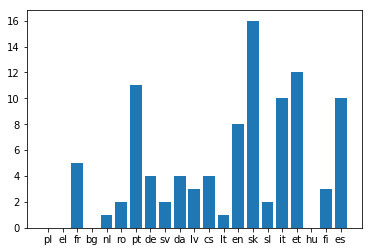

In [29]:
plt.bar(wrong_pred.keys(), wrong_pred.values())
plt.show()

The most number of mismatches happened with slovak(sk) - 16, Estonian(et) - 12, portugese(pt) - 11, italian(it) - 10, spanish(es) - 10. While bulgarian(bg), polish(pl), hungarian(hu) and greek(el) has true positive rate 1.

In [30]:
# Convert the classes to numbers
classes_map = {}
classes = []
for ind, key in enumerate(count.keys()):
    classes_map[key] = ind
    classes.append(key)

test_labels_n, output_labels_n = [], []
for i in range(len(test_labels)):
    test_labels_n.append(classes_map[test_labels[i]])
    output_labels_n.append(classes_map[output_labels[i]])

Text(123,0.5,'True')

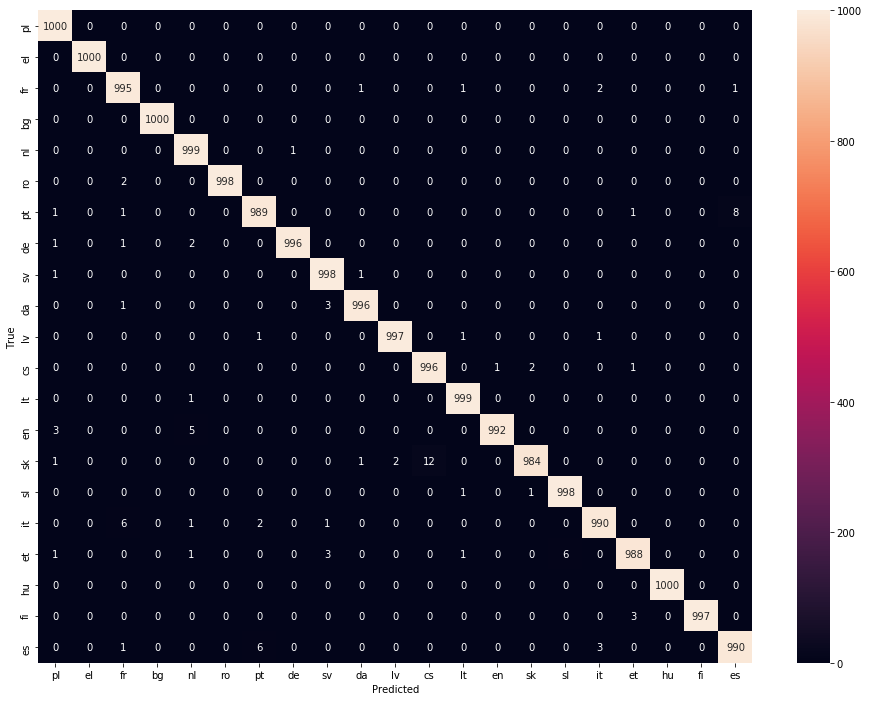

In [31]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels_n, output_labels_n)

import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(cnf_matrix, annot=True, fmt='g',ax=ax)
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.xlabel('Predicted')
plt.ylabel('True')

From confusion matrix we can seee that 42 English(en) sentences are classified as Dutch(nl). Lets see what are those sentences.

In [32]:
counter = 0
for i in range(len(output_labels)):
    if (output_labels[i] == 'nl') and (test_labels[i] == 'en'):
        print(test_data[i])
        print(new_data[i])
        print("----------------------------------------------")
        counter += 1
    if counter == 5:
        break

at present this region is full of memories 
at pres rese esen sent this regi egio gion is full of memo emor mori orie ries
----------------------------------------------
mrs ibrahim we stand shoulder to shoulder with you in rejecting this cruelty and our rejection will be total 
mrs ibra brah rahi ahim we stan tand shou houl ould ulde lder to shou houl ould ulde lder with you in reje ejec ject ecti ctin ting this crue ruel uelt elty and our reje ejec ject ecti ctio tion will be tota otal
----------------------------------------------
the same has happened under other circumstances 
the same has happ appe ppen pene ened unde nder othe ther circ ircu rcum cums umst msta stan tanc ance nces
----------------------------------------------
the short answer to this is ‘no’ 
the shor hort answ nswe swer to this is ‘n ��no �no� no� o’
----------------------------------------------
we must help others to help themselves 
we must help othe ther hers to help them hems emse msel selv elve lves
----

**4-gram model is great. But since this model doesn't uses context, What if we include 4-grams and complete word together?**